# k-means++

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.data.shape # 샘플수 1797, 변수 64개 (8x8 픽셀)

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
#   픽셀 정규화
#   픽셀값/255. => 0.0~1.0

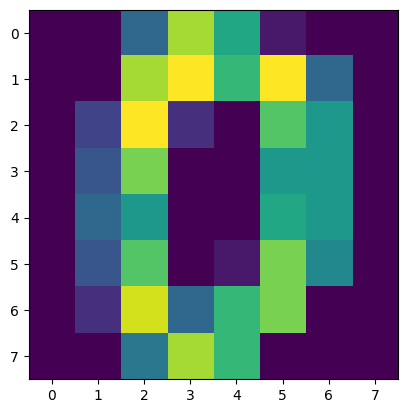

In [12]:
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8,8))

In [27]:
from sklearn.cluster import KMeans

# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ 기본값, random 랜덤으로 선택

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
#              초기좌표           군집수
# model = KMeans(init="random", n_clusters=10, random_state=0)

model.fit(digits.data)

y_pred = model.labels_
#              출력값
print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  2.24719101e-02  4.25280899e+00  1.31629213e+01
   1.12471910e+01  2.92134831e+00  3.37078652e-02  2.77555756e-17
   2.60208521e-18  8.87640449e-01  1.26629213e+01  1.33595506e+01
   1.13820225e+01  1.13483146e+01  9.66292135e-01 -2.77555756e-17
   1.30104261e-18  3.74719101e+00  1.42078652e+01  5.19662921e+00
   2.09550562e+00  1.20955056e+01  3.53370787e+00  1.38777878e-17
   2.16840434e-19  5.31460674e+00  1.26348315e+01  2.01685393e+00
   2.30337079e-01  9.06179775e+00  6.46629213e+00  4.33680869e-19
   0.00000000e+00  5.88202247e+00  1.14831461e+01  8.70786517e-01
   2.80898876e-02  8.78089888e+00  7.15730337e+00  0.00000000e+00
   1.73472348e-18  3.52808989e+00  1.33033708e+01  1.58988764e+00
   1.41573034e+00  1.13258427e+01  5.85955056e+00  1.73472348e-17
   5.20417043e-18  8.08988764e-01  1.31685393e+01  9.92696629e+00
   1.03202247e+01  1.32921348e+01  2.48314607e+00  2.24719101e-02
   1.08420217e-19  5.61797753e-03  4.21910112e+00  1.36123596e+01
   1.33426

c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
import matplotlib.pyplot as plt

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    #                      가로:8,세로:2
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        #                   1행 10열, 1번~10번
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
 
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        plt.tight_layout()

        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]

    show_digits(images, y_pred)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7468\3618817170.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


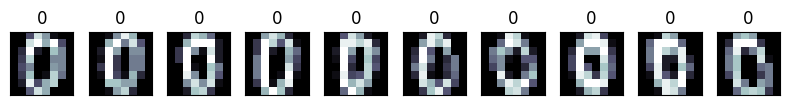

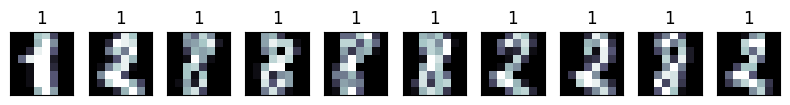

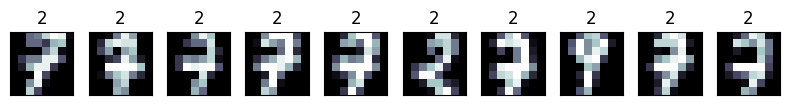

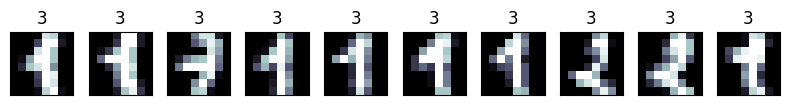

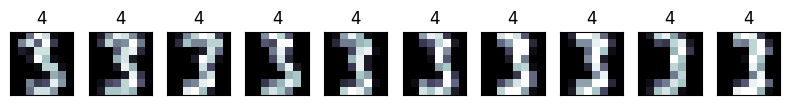

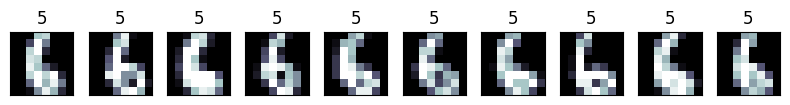

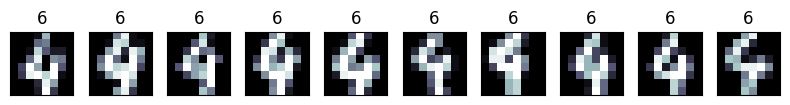

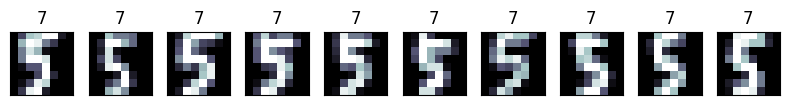

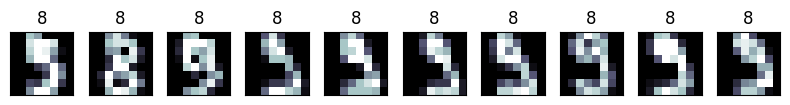

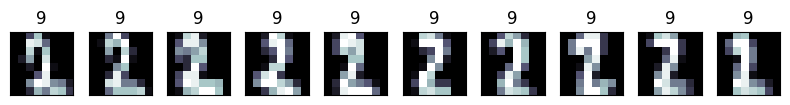

In [29]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)
#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음   

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)     #   confusion_matrix 정답이 있을때 사용

array([[176,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 100,   0,  54,   1,   2,   0,   1,   0,  24],
       [  1,   8,   3,   2,  13,   0,   0,   0,   2, 148],
       [  0,   7,   7,   0, 154,   0,   0,   2,  13,   0],
       [  0,   2,  11,   3,   0,   0, 165,   0,   0,   0],
       [  0,   0,   0,   0,   2,   1,   2, 136,  41,   0],
       [  1,   3,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   2, 174,   2,   0,   0,   0,   1,   0,   0],
       [  0, 100,   5,   6,   2,   2,   0,   4,  52,   3],
       [  0,   1,   8,  20,   6,   0,   0,   6, 139,   0]], dtype=int64)

In [31]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)
#   1.0에 가까울수록 클러스터링 잘된것임
# k-means++ : 0.18253573914791615
# random    : 0.18189172660646816

0.18253573914791615

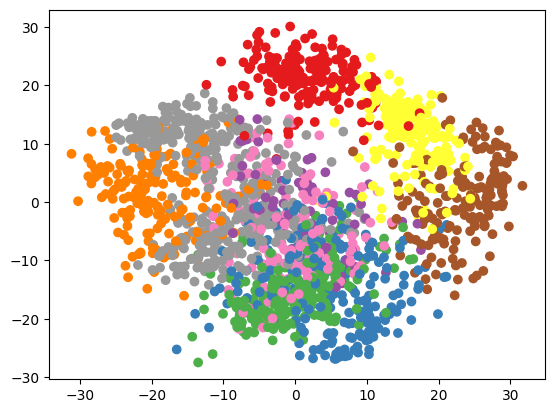

In [32]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#     주성분분석    주성분의 수
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)

plt.show()